# This will be my first deliverable for the BBC text classifcation project

Let's start by importing libraries:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt 

In [4]:
pip install "altair[all]"

Note: you may need to restart the kernel to use updated packages.


And load in the training and testing data:

In [6]:
train_raw = pd.read_csv("BBC News Train.csv")
test_raw = pd.read_csv("BBC News Test.csv")
#train_raw = pd.merge(train_raw, test_raw, how="outer")

In [7]:
test_raw.head()

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


## EDA

Let's first see what our data is about:

In [10]:
train_raw.info

<bound method DataFrame.info of       ArticleId                                               Text  \
0          1833  worldcom ex-boss launches defence lawyers defe...   
1           154  german business confidence slides german busin...   
2          1101  bbc poll indicates economic gloom citizens in ...   
3          1976  lifestyle  governs mobile choice  faster  bett...   
4           917  enron bosses in $168m payout eighteen former e...   
...         ...                                                ...   
1485        857  double eviction from big brother model caprice...   
1486        325  dj double act revamp chart show dj duo jk and ...   
1487       1590  weak dollar hits reuters revenues at media gro...   
1488       1587  apple ipod family expands market apple has exp...   
1489        538  santy worm makes unwelcome visit thousands of ...   

           Category  
0          business  
1          business  
2          business  
3              tech  
4          busine

In [11]:
test_raw.info

<bound method DataFrame.info of      ArticleId                                               Text
0         1018  qpr keeper day heads for preston queens park r...
1         1319  software watching while you work software that...
2         1138  d arcy injury adds to ireland woe gordon d arc...
3          459  india s reliance family feud heats up the ongo...
4         1020  boro suffer morrison injury blow middlesbrough...
..         ...                                                ...
730       1923  eu to probe alitalia  state aid  the european ...
731        373  u2 to play at grammy awards show irish rock ba...
732       1704  sport betting rules in spotlight a group of mp...
733        206  alfa romeos  to get gm engines  fiat is to sto...
734        471  citizenship event for 18s touted citizenship c...

[735 rows x 2 columns]>

We can see that the test dataset does not have the labels, so I will have to use the data in them differently. 

In [13]:
train_raw.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [14]:
test_raw.head()

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


Let's check the categories in the train set to make sure all is valid:

In [16]:
train_raw.Category.unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

Looks good, all the categories are valid

Let's check for missing values in the text field

In [19]:
nullLocSeries = pd.isnull(train_raw["Text"])
print(train_raw[nullLocSeries])

Empty DataFrame
Columns: [ArticleId, Text, Category]
Index: []


In [20]:
nullLocSeries = pd.isnull(test_raw["Text"])
print(test_raw[nullLocSeries])

Empty DataFrame
Columns: [ArticleId, Text]
Index: []


Looks like we don't have any, excellent

We have a training label column and a raw text column. Let's first record the label column:

In [23]:
train_label = train_raw.Category

#### Feature Extraction from text (2 versions for different purposes)

Let's then extract some features from the texts in each column

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

For this i will use TF-IDF, it is implemented in sklearn:

##### The first version will be used for a visualization:

In [29]:
vectorizer = TfidfVectorizer()

In [30]:
train_data1 = vectorizer.fit_transform(train_raw.Text)

That gave us a sparse matrix, let's see what it has:

In [32]:
print(train_data1)

  (0, 1009)	0.05643509689668293
  (0, 23572)	0.05171683198420305
  (0, 6472)	0.02902507640882694
  (0, 5342)	0.044434208471766566
  (0, 23661)	0.05875637443991937
  (0, 4150)	0.0601801944482067
  (0, 1652)	0.034102087269467486
  (0, 24104)	0.02383356638673293
  (0, 13075)	0.017706106467856114
  (0, 14251)	0.10916318514966579
  (0, 12865)	0.03184197913561059
  (0, 407)	0.025019777226527817
  (0, 17579)	0.039549514785291666
  (0, 2875)	0.04289120555750058
  (0, 9615)	0.012344388705610583
  (0, 8036)	0.043630523793597796
  (0, 8748)	0.038172940645020706
  (0, 12224)	0.021277420879685587
  (0, 1792)	0.017252502375521908
  (0, 5810)	0.049059642984184255
  (0, 11448)	0.018347791308608738
  (0, 24617)	0.02055116391848126
  (0, 1076)	0.048608990336853036
  (0, 19913)	0.049533415911568075
  (0, 12316)	0.04415847017280601
  :	:
  (1489, 11033)	0.08625548429839593
  (1489, 15792)	0.020993536539211335
  (1489, 16046)	0.017799215951455238
  (1489, 17416)	0.03244209969602519
  (1489, 4156)	0.0727512

and let's check the features and their names:

In [34]:
feature_names = vectorizer.get_feature_names_out()

In [35]:
print(len(feature_names))

24746


In [36]:
print(feature_names) 

['00' '000' '0001' ... 'zurich' 'zutons' 'zvonareva']


##### Version 2 for model fitting

For this version i will combine the datasets before feture extraction so that we have the same list of dimensions so that model fitting is easier. 

We can separate these later as needed as the concatemation did not shuffle their orders

In [39]:
combineTestTrain = pd.concat([train_raw.Text,test_raw.Text], ignore_index=True)

In [40]:
print(combineTestTrain)

0       worldcom ex-boss launches defence lawyers defe...
1       german business confidence slides german busin...
2       bbc poll indicates economic gloom citizens in ...
3       lifestyle  governs mobile choice  faster  bett...
4       enron bosses in $168m payout eighteen former e...
                              ...                        
2220    eu to probe alitalia  state aid  the european ...
2221    u2 to play at grammy awards show irish rock ba...
2222    sport betting rules in spotlight a group of mp...
2223    alfa romeos  to get gm engines  fiat is to sto...
2224    citizenship event for 18s touted citizenship c...
Name: Text, Length: 2225, dtype: object


In [41]:
vectorizer2 = TfidfVectorizer()

In [42]:
combineTestTrain_data = vectorizer2.fit_transform(combineTestTrain)

In [43]:
trainData = combineTestTrain_data[0:1490]

In [44]:
testData = combineTestTrain_data[1490:]

### Plot the sparsity pattern of the sparse matrix

Let's get an idea how sparse the data is:

I will alter our data in order to do visualization:

In [48]:
matrix = combineTestTrain_data.todense()

In [49]:
print(matrix)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02037496 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


Matloptlib.pyplot.spy() visualizes all non zero entires in the matrix, so it would not show how far from 0 but will show that it is not 0. 

for more here is the documentation: 

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.spy.html

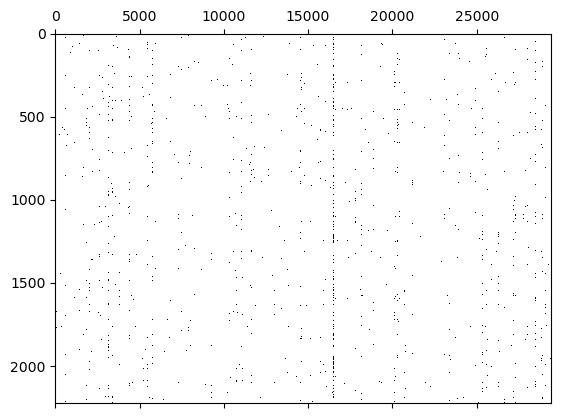

In [51]:
#plt.figure().set_figheight(250)
plt.spy(matrix, aspect = 'auto') 

plt.show()

Yeah, our matrix looks quite sparse. This informs us of what matrix factorization loss function we should use. we probably should avoid L1 and L2 loss functions. Perhaps KL loss would work better.

In [53]:
matrix.shape

(2225, 29421)

### Average proportion of each word in the documents

In [55]:
averageProportion = np.transpose(np.average(matrix.copy(), axis = 0))

In [56]:
len(averageProportion)

29421

In [57]:
print(averageProportion)

[[1.18556843e-04]
 [8.34099201e-03]
 [2.61486336e-05]
 ...
 [5.00713556e-05]
 [1.17236905e-04]
 [9.91553570e-05]]


Text(0.5, 1.0, 'Average Proportions of words')

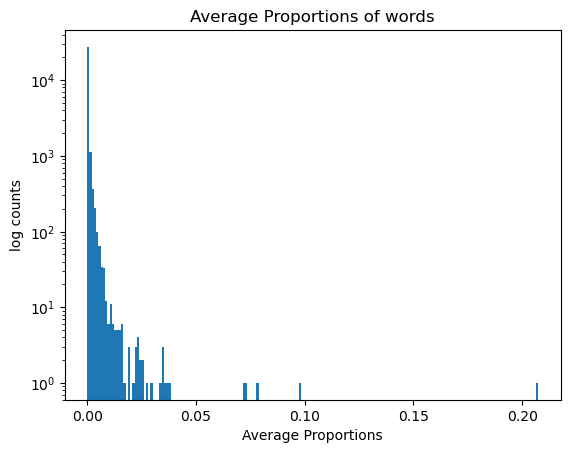

In [58]:
fig, ax = plt.subplots()
ax.hist(averageProportion, bins = 200, log = True)
ax.set_ylabel('log counts')
ax.set_xlabel('Average Proportions')
ax.set_title('Average Proportions of words')

### Dimensionality reduction and scatterplot (training set only)

##### Okay, let's do a LSA to see if we can visualize our data into 2d clusters:

For those who don't know, LSA is short for latent semantic analysis. It's similar to PCA in that it is a dimensionality reduction technique. LSA works the same as SVD. 

Our matrix is obviously very sparse, and is very high dimensional. To visualize the documents in 2d space we have to reduce the matrix down and preserve as much information as we can. 

Once we reduce our matrix down the dimensions remaining are known as latent/hidden features, hence the name. 

For more here is a good read:

https://towardsdatascience.com/latent-semantic-analysis-intuition-math-implementation-a194aff870f8

In [62]:
from sklearn.decomposition import TruncatedSVD

I will be using TruncatedSVD because, unlike PCA, it does not center the data. So this will be more efficient with the sparse matrix we have. 

for more this is the documentation:

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html#sklearn.decomposition.TruncatedSVD

In [64]:
reducedTD = TruncatedSVD(n_components = 2).fit_transform(train_data1)

In [65]:
print(reducedTD)

[[ 0.21705829  0.04926566]
 [ 0.35138049 -0.00298322]
 [ 0.43405367  0.00184274]
 ...
 [ 0.354803   -0.04031567]
 [ 0.47948676 -0.04376264]
 [ 0.29749496 -0.00731551]]


So we have our transformed data. 

Let's see what are the explained variance ratio of these latent features:

In [67]:
print(TruncatedSVD(n_components = 2).fit(train_data1).explained_variance_ratio_)

[0.00796477 0.01072843]


Not great, that is to be expected because we are reducing our data of over 20k dismensions to 2 dimensions, a drastic reduction. But having 2 dimensions makes it so that we can easily plot the documents. 

In [69]:
train_labelVis = train_label

I will create a dataframe to make plotting easier. 

In [71]:
vis = pd.DataFrame(reducedTD, columns = ['LF2','LF1'])
vis.insert(2, "labels", train_labelVis, True)

In [72]:
vis.head()

,LF2,LF1,labels
0,0.217058,0.049266,business
1,0.351380,-0.002983,business
2,0.434054,0.001843,business
3,0.399941,-0.006065,tech
4,0.356941,-0.018531,business


In [73]:
print(pd.factorize(vis.labels))

(array([0, 0, 0, ..., 0, 1, 1], dtype=int64), Index(['business', 'tech', 'politics', 'sport', 'entertainment'], dtype='object'))


In [74]:
import altair as alt
alt.Chart(vis).mark_point().encode(x='LF1',y='LF2', color='labels')

C:\Users\Johns\AppData\Local\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

So here we have the documents plotted along the first 2 latent features on a 2d plane. 

This plot isn't very interpretable. But we can see the clusters formed by the documents of each type. 

We can see that business and tech tend to use similar words in similar frequencies, hence their overlap. 
The fact that entertainment and sport are so close is not really surprising. 

## Building and training models

### NMF

In [78]:
from sklearn.decomposition import NMF

Based on the EDA earlier, we can say that we need multiplicative noise uisng KL loss because our data has a lot of 0 values. 

In [80]:
NMF1 = NMF(n_components = 5, solver = 'mu', beta_loss = 'kullback-leibler', verbose = 1).fit(combineTestTrain_data)

Epoch 10 reached after 0.614 seconds, error: 383.320254
Epoch 20 reached after 1.165 seconds, error: 380.840542
Epoch 30 reached after 1.750 seconds, error: 380.417688
Epoch 40 reached after 2.316 seconds, error: 380.251637
Epoch 50 reached after 2.866 seconds, error: 380.172450
Epoch 60 reached after 3.417 seconds, error: 380.131149
Epoch 70 reached after 3.967 seconds, error: 380.111442


In [81]:
H1 = NMF1.components_

In [82]:
transformedData1 = NMF1.transform(trainData)

Epoch 10 reached after 0.220 seconds, error: 310.735600
Epoch 20 reached after 0.408 seconds, error: 310.634494
Epoch 30 reached after 0.615 seconds, error: 310.626284


Lat's see what our algo says about which belongs to which:

In [84]:
WTrain1 = transformedData1

In [85]:
print(WTrain1)

[[1.24496004e-01 4.63301316e-03 1.48345311e-06 4.71102059e-06
  3.02555168e-03]
 [1.60125183e-01 3.64475168e-08 2.47871742e-11 1.72601462e-10
  2.29337226e-14]
 [1.11805497e-01 4.97288812e-02 1.25475477e-06 3.17446284e-04
  1.28921720e-07]
 ...
 [1.46961306e-01 1.39049897e-09 4.06678070e-07 4.40722618e-11
  5.38494408e-09]
 [5.58239461e-05 1.69013047e-10 8.00868865e-09 1.41168248e-01
  8.95024198e-09]
 [1.51538242e-04 1.25536015e-10 5.79932319e-11 1.01874517e-01
  3.37829997e-09]]


In [86]:
WTest1 = NMF1.transform(testData)

Epoch 10 reached after 0.095 seconds, error: 219.158008
Epoch 20 reached after 0.196 seconds, error: 219.084995
Epoch 30 reached after 0.296 seconds, error: 219.078849


In [87]:
print(WTest1.shape)

(735, 5)


Here the $W$ matrix tells us which of the 5 latent groups our data point seems to belong. 

This really resembles Naive bayes model in supervised learning.

I'll define a function that gives us the predicted group based on the transformed data:

In [89]:
def NMFPrediction(W):
    result = []
    for i in W:
        maxValue = 0
        maxIndex = None
        for j in range(0,len(i)):
            if i[j] > maxValue:
                maxValue = i[j]
                maxIndex = j
        result.append(maxIndex)
    return np.array(result)

In [90]:
TrainingSetPrediction1 = NMFPrediction(WTrain1)
TestingSetPrediction1 = NMFPrediction(WTest1)

In [1]:
print(TrainingSetPrediction1.shape)
print(train_labelVis.shape)

NameError: name 'TrainingSetPrediction1' is not defined

Now to match which prediction goes with which label

In [93]:
import itertools

def label_permute_compare(ytdf,yp):
    """
    This is taken from what i wrote in the week 2 assignment
    Still useful here
    """
    ytdf = ytdf.squeeze()
    n = len(ytdf.unique())
    listOfLabels = list(ytdf.unique())
    possibleComb = itertools.permutations(listOfLabels)
    clusteringLabels = list(np.arange(0,n))
    maxAccu = 0
    mostAccurateLabels = []
    for trueLabels in possibleComb:
        labelDict = dict(zip(clusteringLabels, trueLabels))
        correctPrediction = 0
        total = len(yp)
        for i in range(len(yp)):
            if labelDict[yp[i]] == ytdf[i]:
                correctPrediction += 1
        accuracy = correctPrediction/total
        if accuracy > maxAccu:
            mostAccurateLabels = trueLabels
            maxAccu = accuracy
    return mostAccurateLabels, maxAccu

Okay time to say which prediction goes with which now. 

In [95]:
Prediction_ruleNMF1, accuracy = label_permute_compare(train_labelVis, TrainingSetPrediction1)

In [96]:
print(Prediction_ruleNMF1, accuracy)

('business', 'politics', 'sport', 'tech', 'entertainment') 0.9523489932885906


In [97]:
def applyPredictionRule(rule, predicted):
    output = [rule[i] for i in predicted]
    return output

In [98]:
trainsetPredictedLabels1 = applyPredictionRule(Prediction_ruleNMF1, TrainingSetPrediction1)

In [99]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [100]:
confusion_matrix(train_labelVis, trainsetPredictedLabels1)

array([[320,   0,   8,   0,   8],
       [  6, 261,   2,   1,   3],
       [ 17,   3, 252,   0,   2],
       [  1,   1,   0, 344,   0],
       [  9,   7,   3,   0, 242]], dtype=int64)

In [101]:
print("accuracy score: ", accuracy_score(train_labelVis, trainsetPredictedLabels1))

accuracy score:  0.9523489932885906


Let's now check for our accuracy in the test set:

In [103]:
testsetPredictedLabels1 = applyPredictionRule(Prediction_ruleNMF1, TestingSetPrediction1)

In [104]:
export = pd.DataFrame(test_raw.ArticleId)
export.insert(1, "Category", testsetPredictedLabels1, True)

In [105]:
export.head()

,ArticleId,Category
0,1018,sport
1,1319,tech
2,1138,sport
3,459,business
4,1020,sport


In [106]:
export.to_csv("exportNMF1.csv", index=False)

here is what i got: Score: 0.96462

### changing hyperparameters

For this one I will tweak the loss function:

This frobenius loss function according to our EDA is not suitable for our data. But let's still use it to see if that changes our prediction accuracy:

In [110]:
NMF2 = NMF(n_components = 5, beta_loss = 'frobenius', verbose = 0).fit(combineTestTrain_data)

In [111]:
WTrain2 = NMF2.transform(trainData)

In [112]:
WTest2 = NMF2.transform(testData)

In [113]:
print(WTrain2)

[[0.03758543 0.04893749 0.00700722 0.00354968 0.        ]
 [0.14159208 0.         0.         0.         0.        ]
 [0.1002023  0.02135013 0.01101948 0.03898525 0.01618056]
 ...
 [0.13129771 0.         0.00802555 0.         0.        ]
 [0.03276834 0.         0.         0.18744771 0.01163652]
 [0.02227496 0.         0.00588215 0.10107326 0.00502556]]


In [114]:
TrainingSetPrediction2 = NMFPrediction(WTrain2)
TestingSetPrediction2 = NMFPrediction(WTest2)

In [115]:
Prediction_ruleNMF2, accuracy2 = label_permute_compare(train_labelVis, TrainingSetPrediction2)

In [116]:
print(Prediction_ruleNMF2, accuracy2)

('business', 'politics', 'sport', 'tech', 'entertainment') 0.8818791946308725


In [117]:
trainsetPredictedLabels2 = applyPredictionRule(Prediction_ruleNMF2, TrainingSetPrediction2)

In [118]:
confusion_matrix(train_labelVis, trainsetPredictedLabels2)

array([[297,   1,  16,   3,  19],
       [  7, 206,   5,  19,  36],
       [ 15,   0, 219,   4,  36],
       [  2,   2,   0, 342,   0],
       [  5,   3,   1,   2, 250]], dtype=int64)

In [119]:
print("accuracy score: ", accuracy_score(train_labelVis, trainsetPredictedLabels2))

accuracy score:  0.8818791946308725


In [120]:
testsetPredictedLabels2 = applyPredictionRule(Prediction_ruleNMF2, TestingSetPrediction2)

In [121]:
export2 = pd.DataFrame(test_raw.ArticleId)
export2.insert(1, "Category", testsetPredictedLabels2, True)
export2.to_csv("exportNMF2.csv", index=False)

This time our score for the test set: 0.89115

As expected, using the wrong loss function is a problem, our prediction accuracy dropped and we can see that our predictions are a lot less certain. 

Text(0.5, 1.0, 'Accuracy for different loss functions')

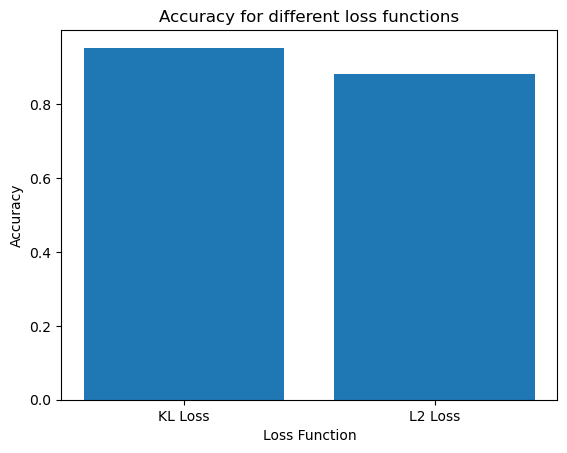

In [124]:
fig, ax = plt.subplots()
ax.bar(["KL Loss", "L2 Loss"], [accuracy_score(train_labelVis, trainsetPredictedLabels1), accuracy_score(train_labelVis, trainsetPredictedLabels2)])
ax.set_ylabel('Accuracy')
ax.set_xlabel('Loss Function')
ax.set_title('Accuracy for different loss functions')

We can see that the KL loss performed better than L2 loss. 

### Tweak our text vectorization for (possibly) better model performance

In this version I will not vectorize words that take up more than 15% of the vectors

In [128]:
vectorizer3 = TfidfVectorizer(max_df = 0.15)

In [129]:
combineTestTrain_data2 = vectorizer3.fit_transform(combineTestTrain)

In [130]:
trainData2 = combineTestTrain_data2[0:1490]
testData2 = combineTestTrain_data2[1490:]

In [131]:
reducedTD2 = TruncatedSVD(n_components = 2).fit_transform(trainData2)
vis = pd.DataFrame(reducedTD2, columns = ['LF2','LF1'])
vis.insert(2, "labels", train_labelVis, True)
alt.Chart(vis).mark_point().encode(x='LF1',y='LF2', color='labels')

C:\Users\Johns\AppData\Local\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

I will skip some of the visualizations, this latent feature plot is just here to show that we are actually making a difference. 

In [133]:
NMF3 = NMF(n_components = 5, solver = 'mu', beta_loss = 'kullback-leibler', verbose = 1).fit(combineTestTrain_data2)
WTrain3 = NMF3.transform(trainData2)
WTest3 = NMF3.transform(testData2)

Epoch 10 reached after 0.425 seconds, error: 390.381873
Epoch 20 reached after 0.818 seconds, error: 388.973934
Epoch 30 reached after 1.227 seconds, error: 388.629343
Epoch 40 reached after 1.635 seconds, error: 388.475780
Epoch 50 reached after 2.061 seconds, error: 388.370233
Epoch 60 reached after 2.454 seconds, error: 388.322485
Epoch 70 reached after 2.848 seconds, error: 388.257099
Epoch 80 reached after 3.274 seconds, error: 388.235342
Epoch 10 reached after 0.141 seconds, error: 317.244234
Epoch 20 reached after 0.272 seconds, error: 317.203466
Epoch 30 reached after 0.410 seconds, error: 317.200023
Epoch 10 reached after 0.063 seconds, error: 223.885167
Epoch 20 reached after 0.110 seconds, error: 223.854325
Epoch 30 reached after 0.163 seconds, error: 223.851742


In [134]:
TrainingSetPrediction3 = NMFPrediction(WTrain3)
TestingSetPrediction3 = NMFPrediction(WTest3)

In [135]:
Prediction_ruleNMF3, accuracy = label_permute_compare(train_labelVis, TrainingSetPrediction3)

In [136]:
print(Prediction_ruleNMF3, accuracy)

('tech', 'politics', 'sport', 'entertainment', 'business') 0.9409395973154362


In [137]:
trainsetPredictedLabels3 = applyPredictionRule(Prediction_ruleNMF3, TrainingSetPrediction3)

In [138]:
confusion_matrix(train_labelVis, trainsetPredictedLabels3)

array([[286,   0,   7,   1,  42],
       [  1, 263,   0,   0,   9],
       [  3,   3, 260,   1,   7],
       [  1,   0,   0, 345,   0],
       [  0,  13,   0,   0, 248]], dtype=int64)

In [139]:
print("accuracy score: ", accuracy_score(train_labelVis, trainsetPredictedLabels3))

accuracy score:  0.9409395973154362


In [140]:
testsetPredictedLabels3 = applyPredictionRule(Prediction_ruleNMF3, TestingSetPrediction3)
export3 = pd.DataFrame(test_raw.ArticleId)
export3.insert(1, "Category", testsetPredictedLabels3, True)
export3.to_csv("exportNMF3.csv", index=False)

The score we got: 0.94557

Text(0.5, 1.0, 'Accuracy for different vectorizations')

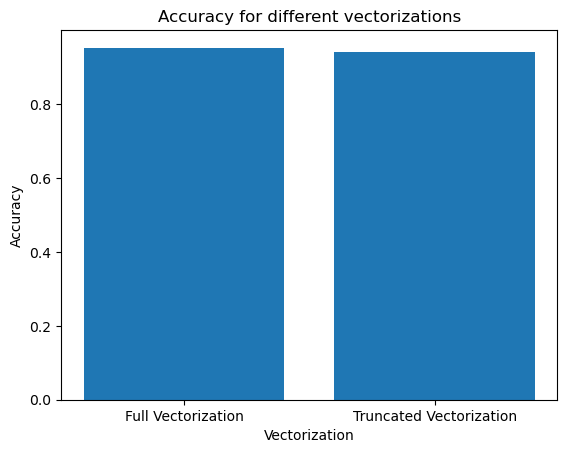

In [602]:
fig, ax = plt.subplots()
ax.bar(["Full Vectorization", "Truncated Vectorization"], [accuracy_score(train_labelVis, trainsetPredictedLabels1), accuracy_score(train_labelVis, trainsetPredictedLabels3)])
ax.set_ylabel('Accuracy')
ax.set_xlabel('Vectorization')
ax.set_title('Accuracy for different vectorizations')

Well we tried, turns out removing words (even if frequent) from being vectorized makes the prediction less accurate. 

## Compare to supervised learning

There are a few models that could work here. 

Without using dimentionality reduction, we could use a random forest model or a SVM model, both of these are good with high dimentional data.
Here I will attempt the random forest:

Random forest is actually not that vulnerable to overfitting, even if we make our number of estimators huge we still don't see a rise in prediction error from overfitting. 

Be ware though, these random forest model will have hyperparameter tuning, and so they may take a bit to run. My computer's fan started going real fast once I started the process. 

### Random forest model

In [146]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [147]:
Enc = LabelEncoder()
Enc.fit(train_labelVis)
train_labelEnc = Enc.transform(train_labelVis)

I will do some hyperparameter tuning here to try to optimize this. 

In [149]:
ccp_alpha = list(range(0,5))
ccp_alpha = [(x/100) for x in ccp_alpha]
RFParamGrid = {'ccp_alpha': ccp_alpha, 'criterion' : ['gini', 'entropy', 'log_loss']}
RFGrid = GridSearchCV(estimator = RandomForestClassifier(n_estimators=500), param_grid = RFParamGrid, scoring = 'accuracy',
                       cv = 5).fit(trainData, train_labelEnc)
RFGrid.best_params_

{'ccp_alpha': 0.0, 'criterion': 'gini'}

In [150]:
print("Cross Validation best accuracy score: ", RFGrid.best_score_)

Cross Validation best accuracy score:  0.9510067114093961


In [151]:
RFModel = RFGrid.best_estimator_

In [152]:
RFPrediction = RFModel.predict(testData)

In [153]:
RFPrediction = Enc.inverse_transform(RFPrediction)

In [221]:
testsetPredictedLabels4 = RFPrediction
export4 = pd.DataFrame(test_raw.ArticleId)
export4.insert(1, "Category", testsetPredictedLabels4, True)
export4.to_csv("exportRF1.csv", index=False)

score we got for this using random forest: 0.96326

This score is virtually identical to what we got using NMF with KL loss.  

### So for this step let's suppose that we only have 50% of our originally labeled data available. 

In [342]:
X_train05, xVoidTest, y_train05, yVoidTest = train_test_split(trainData, train_labelVis, train_size = 0.5, test_size = 0.5, random_state = 31)

Let'e start with NMF:

For this one I will fit the unsupervised model with just 50% of the original data. But i will compare fits when it comes to the entire train and test sets as before so we have a fair comparison. 

In [346]:
NMF05 = NMF(n_components = 5, solver = 'mu', beta_loss = 'kullback-leibler', verbose = 1).fit(X_train05)

Epoch 10 reached after 0.291 seconds, error: 216.464689
Epoch 20 reached after 0.653 seconds, error: 214.743460
Epoch 30 reached after 0.978 seconds, error: 214.374855
Epoch 40 reached after 1.328 seconds, error: 214.197760
Epoch 50 reached after 1.703 seconds, error: 214.095399
Epoch 60 reached after 2.054 seconds, error: 214.026047
Epoch 70 reached after 2.416 seconds, error: 213.987551
Epoch 80 reached after 2.779 seconds, error: 213.944579
Epoch 90 reached after 3.151 seconds, error: 213.906550
Epoch 100 reached after 3.513 seconds, error: 213.883745


In [347]:
WTrain05 = NMF05.transform(trainData)
WTest05 = NMF05.transform(testData)

Epoch 10 reached after 0.372 seconds, error: 328.759571
Epoch 20 reached after 0.723 seconds, error: 328.703585
Epoch 30 reached after 1.061 seconds, error: 328.699046
Epoch 10 reached after 0.204 seconds, error: 250.294103
Epoch 20 reached after 0.349 seconds, error: 250.275422


In [348]:
TrainingSetPrediction05 = NMFPrediction(WTrain05)
TestingSetPrediction05 = NMFPrediction(WTest05)

In [349]:
Prediction_ruleNMF05, accuracy05 = label_permute_compare(train_labelVis, TrainingSetPrediction05)

In [350]:
trainsetPredictedLabels05 = applyPredictionRule(Prediction_ruleNMF05, TrainingSetPrediction05)

In [351]:
print(Prediction_ruleNMF05, accuracy05)

('business', 'politics', 'sport', 'entertainment', 'tech') 0.8825503355704698


In [352]:
confusion_matrix(train_labelVis, trainsetPredictedLabels05)

array([[306,  15,  11,   0,   4],
       [ 18, 202,   4,  11,  38],
       [ 25,   2, 240,   1,   6],
       [  5,   1,   0, 340,   0],
       [ 30,   3,   1,   0, 227]], dtype=int64)

In [353]:
print("accuracy score: ", accuracy_score(train_labelVis, trainsetPredictedLabels05))

accuracy score:  0.8825503355704698


We can see a reduction in accuracy of this prediction, not surprising because our fitting dataset is smaller. 

In [355]:
testsetPredictedLabels05 = applyPredictionRule(Prediction_ruleNMF05, TestingSetPrediction05)
exportNMF05 = pd.DataFrame(test_raw.ArticleId)
exportNMF05.insert(1, "Category", testsetPredictedLabels05, True)
exportNMF05.to_csv("exportNMF05.csv", index=False)

Here we get the score of 0.91836, this is a big reduction of accuracy

Let's try to use supervised learning to see if the accuracy stays good with a smaller dataset. 

In [463]:
Enc05 = LabelEncoder()
Enc05.fit(y_train05)
train_labelEnc05 = Enc05.transform(y_train05)

In [465]:

ccp_alpha = list(range(0,5))
ccp_alpha = [(x/100) for x in ccp_alpha]
RFParamGrid = {'ccp_alpha': ccp_alpha, 'criterion' : ['gini', 'entropy', 'log_loss']}
RFGrid05 = GridSearchCV(estimator = RandomForestClassifier(n_estimators=500), param_grid = RFParamGrid, scoring = 'accuracy',
                       cv = 5).fit(X_train05, train_labelEnc05)
RFGrid05.best_params_

#RFModel05 = RandomForestClassifier(n_estimators=500, criterion = 'gini', ccp_alpha = 0).fit(X_train05, train_labelEnc05)

{'ccp_alpha': 0.01, 'criterion': 'gini'}

In [466]:
print("Cross Validation best accuracy score: ", RFGrid05.best_score_)

Cross Validation best accuracy score:  0.9422818791946307


In [467]:
RFModel05 = RFGrid05.best_estimator_

In [468]:
RFPrediction05 = RFModel05.predict(testData)

In [469]:
RFPrediction05 = Enc05.inverse_transform(RFPrediction05)

In [470]:
testsetPredictedLabels05 = RFPrediction05
exportRF05 = pd.DataFrame(test_raw.ArticleId)
exportRF05.insert(1, "Category", testsetPredictedLabels05, True)
exportRF05.to_csv("exportRF05.csv", index=False)

Here we get the score of 0.95238, a slight drop, but not horrible. 

### Let's now try 20%

In [473]:
X_train02, xVoidTest, y_train02, yVoidTest = train_test_split(trainData, train_labelVis, train_size = 0.2, test_size = 0.8, random_state = 29)

In [474]:
NMF02 = NMF(n_components = 5, solver = 'mu', beta_loss = 'kullback-leibler', verbose = 1).fit(X_train02)

Epoch 10 reached after 0.111 seconds, error: 129.246185
Epoch 20 reached after 0.192 seconds, error: 128.713017
Epoch 30 reached after 0.290 seconds, error: 128.625522
Epoch 40 reached after 0.390 seconds, error: 128.589114
Epoch 50 reached after 0.493 seconds, error: 128.569142
Epoch 60 reached after 0.573 seconds, error: 128.559936


In [475]:
WTrain02 = NMF02.transform(trainData)
WTest02 = NMF02.transform(testData)

Epoch 10 reached after 0.382 seconds, error: 360.919581
Epoch 20 reached after 0.734 seconds, error: 360.896533
Epoch 10 reached after 0.190 seconds, error: 266.471812
Epoch 20 reached after 0.371 seconds, error: 266.461133


In [476]:
TrainingSetPrediction02 = NMFPrediction(WTrain02)
TestingSetPrediction02 = NMFPrediction(WTest02)

In [477]:
Prediction_ruleNMF02, accuracy02 = label_permute_compare(train_labelVis, TrainingSetPrediction02)

In [478]:
trainsetPredictedLabels02 = applyPredictionRule(Prediction_ruleNMF02, TrainingSetPrediction02)

In [479]:
print(Prediction_ruleNMF02, accuracy02)

('politics', 'sport', 'business', 'tech', 'entertainment') 0.8684563758389262


In [480]:
confusion_matrix(train_labelVis, trainsetPredictedLabels02)

array([[289,   0,  40,   0,   7],
       [  1, 204,  35,  23,  10],
       [  3,   1, 268,   0,   2],
       [  0,   0,  51, 290,   5],
       [  2,   1,  13,   2, 243]], dtype=int64)

In [481]:
print("accuracy score: ", accuracy_score(train_labelVis, trainsetPredictedLabels02))

accuracy score:  0.8684563758389262


In [482]:
testsetPredictedLabels02 = applyPredictionRule(Prediction_ruleNMF02, TestingSetPrediction02)
export7 = pd.DataFrame(test_raw.ArticleId)
export7.insert(1, "Category", testsetPredictedLabels02, True)
export7.to_csv("exportNMF8.csv", index=False)

We get a score of 0.89659 here. Another drop in accuracy

In [446]:
Enc02 = LabelEncoder()
Enc02.fit(y_train02)
train_labelEnc02 = Enc02.transform(y_train02)

In [484]:

ccp_alpha = list(range(0,5))
ccp_alpha = [(x/100) for x in ccp_alpha]
RFParamGrid = {'ccp_alpha': ccp_alpha, 'criterion' : ['gini', 'entropy', 'log_loss']}
RFGrid02 = GridSearchCV(estimator = RandomForestClassifier(n_estimators=500), param_grid = RFParamGrid, scoring = 'accuracy',
                       cv = 5).fit(X_train02, train_labelEnc02)
RFGrid02.best_params_

#RFModel02 = RandomForestClassifier(n_estimators=500, criterion = 'gini', ccp_alpha = 0).fit(X_train02, train_labelEnc02)

{'ccp_alpha': 0.0, 'criterion': 'gini'}

In [485]:
print("Cross Validation best accuracy score: ", RFGrid02.best_score_)

Cross Validation best accuracy score:  0.9196610169491526


In [486]:
RFModel02 = RFGrid02.best_estimator_

In [487]:
RFPrediction02 = RFModel02.predict(testData)

In [488]:
RFPrediction02 = Enc02.inverse_transform(RFPrediction02)

In [489]:
testsetPredictedLabels02 = RFPrediction02
exportRF02 = pd.DataFrame(test_raw.ArticleId)
exportRF02.insert(1, "Category", testsetPredictedLabels02, True)
exportRF02.to_csv("exportRF02.csv", index=False)

That gave us a score of 0.91428, worse scores, but still better than unsupervised

### Let's now try 10%

In [544]:
X_train01, xVoidTest, y_train01, yVoidTest = train_test_split(trainData, train_labelVis, train_size = 0.1, test_size = 0.9, random_state = 11)

In [546]:
NMF01 = NMF(n_components = 5, solver = 'mu', beta_loss = 'kullback-leibler', verbose = 1).fit(X_train01)

Epoch 10 reached after 0.063 seconds, error: 86.903255
Epoch 20 reached after 0.126 seconds, error: 86.441083
Epoch 30 reached after 0.205 seconds, error: 86.387914
Epoch 40 reached after 0.267 seconds, error: 86.375074
Epoch 50 reached after 0.315 seconds, error: 86.368498


In [547]:
WTrain01 = NMF01.transform(trainData)
WTest01 = NMF01.transform(testData)

Epoch 10 reached after 0.383 seconds, error: 390.313526
Epoch 20 reached after 0.714 seconds, error: 390.303018
Epoch 10 reached after 0.189 seconds, error: 283.377197
Epoch 20 reached after 0.362 seconds, error: 283.371633


In [549]:
TrainingSetPrediction01 = NMFPrediction(WTrain01)
TestingSetPrediction01 = NMFPrediction(WTest01)

In [550]:
Prediction_ruleNMF01, accuracy01 = label_permute_compare(train_labelVis, TrainingSetPrediction01)
trainsetPredictedLabels01 = applyPredictionRule(Prediction_ruleNMF01, TrainingSetPrediction01)
print(Prediction_ruleNMF01, accuracy01)

('entertainment', 'sport', 'tech', 'politics', 'business') 0.7355704697986577


In [551]:
confusion_matrix(train_labelVis, trainsetPredictedLabels02)

array([[289,   0,  40,   0,   7],
       [  1, 204,  35,  23,  10],
       [  3,   1, 268,   0,   2],
       [  0,   0,  51, 290,   5],
       [  2,   1,  13,   2, 243]], dtype=int64)

In [552]:
print("accuracy score: ", accuracy_score(train_labelVis, trainsetPredictedLabels01))

accuracy score:  0.7355704697986577


In [553]:
testsetPredictedLabels01 = applyPredictionRule(Prediction_ruleNMF01, TestingSetPrediction01)
export01 = pd.DataFrame(test_raw.ArticleId)
export01.insert(1, "Category", testsetPredictedLabels01, True)
export01.to_csv("exportNMF01.csv", index=False)

That gave us a score of 0.74421, this is really starting to fall off

In [557]:
Enc01 = LabelEncoder()
Enc01.fit(y_train01)
train_labelEnc01 = Enc01.transform(y_train01)

In [563]:
ccp_alpha = list(range(0,5))
ccp_alpha = [(x/100) for x in ccp_alpha]
RFParamGrid = {'ccp_alpha': ccp_alpha, 'criterion' : ['gini', 'entropy', 'log_loss']}
RFGrid01 = GridSearchCV(estimator = RandomForestClassifier(n_estimators=500), param_grid = RFParamGrid, scoring = 'accuracy',
                       cv = 5).fit(X_train01, train_labelEnc01)
RFGrid01.best_params_

{'ccp_alpha': 0.0, 'criterion': 'gini'}

In [564]:
print("Cross Validation best accuracy score: ", RFGrid01.best_score_)

Cross Validation best accuracy score:  0.8595402298850574


In [565]:
RFModel01 = RFGrid01.best_estimator_
RFPrediction01 = RFModel01.predict(testData)
RFPrediction01 = Enc01.inverse_transform(RFPrediction01)
testsetPredictedLabels01 = RFPrediction01
exportRF01 = pd.DataFrame(test_raw.ArticleId)
exportRF01.insert(1, "Category", testsetPredictedLabels01, True)
exportRF01.to_csv("exportRF01.csv", index=False)

That gave us a kaggle score of 0.87210, still holding reasonably high. 

### Visualize the result of comparing with supervised learning

#### Training set

In [617]:
plotDF = pd.DataFrame()
plotDF.insert(0, 'data_size', [1,1,0.5,0.5,0.2,0.2,0.1,0.1], True)
plotDF.insert(1, 'prediction_Accuracy', [0.9510067114093961,0.9523489932885906, 0.9422818791946307,0.8825503355704698, 0.9196610169491526,0.8684563758389262, 0.8595402298850574, 0.7355704697986577], True)
plotDF.insert(2, 'type', ['RF', 'NMF', 'RF', 'NMF', 'RF', 'NMF', 'RF', 'NMF'], True)

In [619]:
alt.Chart(plotDF).mark_line().encode(x='data_size',y='prediction_Accuracy', color='type')

C:\Users\Johns\AppData\Local\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

This is the plot for the training set, let's see what about the testing set:

#### Testing set

In [591]:
plotDF = pd.DataFrame()
plotDF.insert(0, 'data_size', [1,1,0.5,0.5,0.2,0.2,0.1,0.1], True)
plotDF.insert(1, 'prediction_Accuracy', [0.96326,0.96462, 0.95238,0.91836, 0.91428,0.89659, 0.87210, 0.74421], True)
plotDF.insert(2, 'type', ['RF', 'NMF', 'RF', 'NMF', 'RF', 'NMF', 'RF', 'NMF'], True)

In [593]:
plotDF.head()

,data_size,prediction_Accuracy,type
0,1.0,0.96326,RF
1,1.0,0.96462,NMF
2,0.5,0.95238,RF
3,0.5,0.91836,NMF
4,0.2,0.91428,RF


In [595]:
alt.Chart(plotDF).mark_line().encode(x='data_size',y='prediction_Accuracy', color='type')

C:\Users\Johns\AppData\Local\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

We can see that the prediction accuracy for both supervised and unsupervised models suffer when the training set size gets small. 

But we also notice that the unsupervised model suffers more from this problem, its accuracy degredation is worse as sample size gets smaller. 

As a result, we can say that the supervised model is more data efficient.